# Model Inference

Nama: Fauzan Rahmat Farghani

Batch: HCK-028

Objective: Notebook ini digunakan untuk menguji prediksi apakah gambar yang diunggah sesuai dengan ekspektasi output yang semestinya (foto mobil menghasilkan output mobil dan foto motor menghasilkan output motor).

# Import Libraries

In [44]:
import tensorflow as tf
import sys
import pandas as pd
import sklearn as sk
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import Image

Pengecekan versi Tensor Flow dan kompatibilitas GPU:

In [45]:
print(f"Tensor Flow Version: {tf.__version__}")
#print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.18.0

Python 3.9.23 (main, Jun  5 2025, 08:49:36) 
[Clang 14.0.6 ]
Pandas 2.2.2
Scikit-Learn 1.6.1
GPU is available


# Model Loading

In [46]:
model = tf.keras.models.load_model('car_bike_classifier.h5')

# Inference Function

In [47]:
def predict_image(image_path):
    # Load original image for display
    img_original = Image.open(image_path)
    # Preprocess for model
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_names = ['Bike', 'Car']
    predicted_class = class_names[int(prediction[0] > 0.4)]
    return predicted_class, img_original

# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


/var/folders/47/0h1065tj6rqd_vly1hg1tym80000gn/T/ipykernel_5418/310375402.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(prediction[0] > 0.4)]


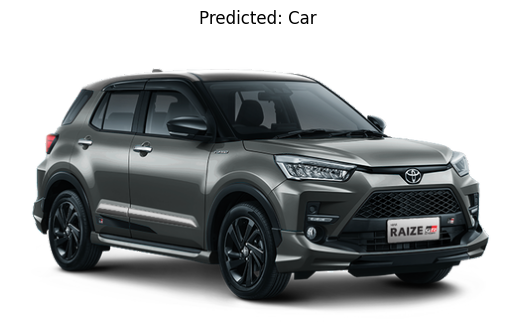

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


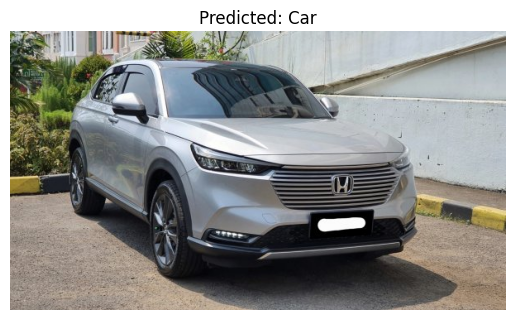

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


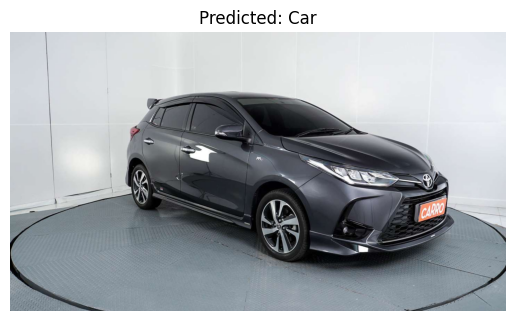

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


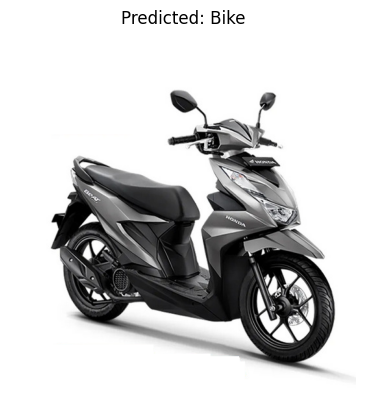

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


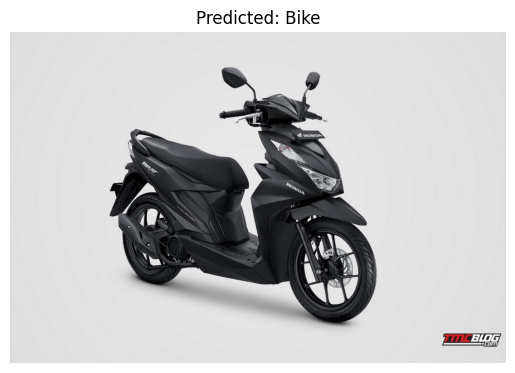

In [50]:
# Test on new images
new_images = ['mobilraize.jpeg', 'fotohrv.jpeg', 'yarisgrabuabu.jpg', 'beatsilver.png', 'beat3.jpg']
for img_path in new_images:
    pred_class, img = predict_image(img_path)
    plt.imshow(img)
    plt.title(f'Predicted: {pred_class}')
    plt.axis('off')
    plt.show()

Berdasarkan hasil inferensi menggunakan 3 foto mobil dan 2 motor, prediksi output sudah sesuai dengan ekspektasi.